In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")
import numpy as np

from data_loading import load_runs

In [3]:
# RUN = ["1","2","3","4b","4c","4d","5"]
RUN = ["3_crt", "4b", "4c", "4d", "5"]

## Defining numu sidebands

In [4]:
rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False, 
    enable_cache=True,
)

Loading run 4b


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsFlux', 'weightsGenie'], dtype='object')]

  encoding=encoding,


Loading run 4c


In [5]:
### To Accomodate Detvars, Use Multiple Singal Generators ###
from microfit.histogram import Binning, MultiChannelBinning
from microfit import histogram as hist
from microfit import detsys

In [6]:
from microfit.histogram import Binning, MultiChannelBinning

numu_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
# numu_binning = Binning.from_config("muon_theta", 14, (-1.0, 1.0), "muon $\\cos(\\theta)$")
numu_binning_np = numu_binning.copy()
numu_binning_np.label = "NUMUCRTNP0PI"
numu_binning_np.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")

numu_binning_zpi = numu_binning.copy()
numu_binning_zpi.label = "NUMUCRT0P0PI"
numu_binning_zpi.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")

numu_binning_inclusive = numu_binning.copy()
numu_binning_inclusive.label = "NUMUCRT"
numu_binning_inclusive.set_selection(preselection="NUMUCRT", selection="NUMUCRT")

sideband_binning = MultiChannelBinning([numu_binning_np, numu_binning_zpi, numu_binning_inclusive])

In [7]:
numu_sideband_generator = hist.RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    uncertainty_defaults=None,
    # detvar_data=numu_sideband_detvars
)

../../microfit/run_plotter.py:117: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/histogram/histogram.py:552: UserWarning: The internal _bin_counts array has off-diagonal elements. The off-diagonal elements will be lost when dividing by an ndarray.
  "The internal _bin_counts array has off-diagonal elements. "


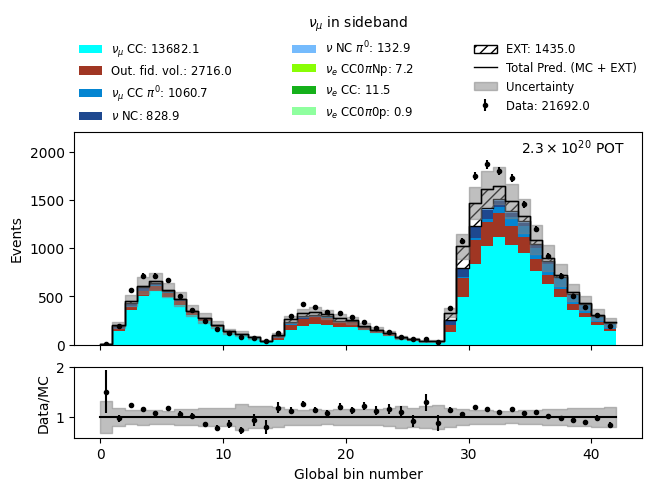

In [8]:
from microfit.run_plotter import RunHistPlotter

ax, ax_ratio = RunHistPlotter(numu_sideband_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    add_precomputed_detsys=False
)
legend = ax.get_legend()
legend.set_title(r"$\nu_\mu$ in sideband")


Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Using run 4 to compute detvars for run 3_crt! Please fix missing CRT variables in run 3!
Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Maki

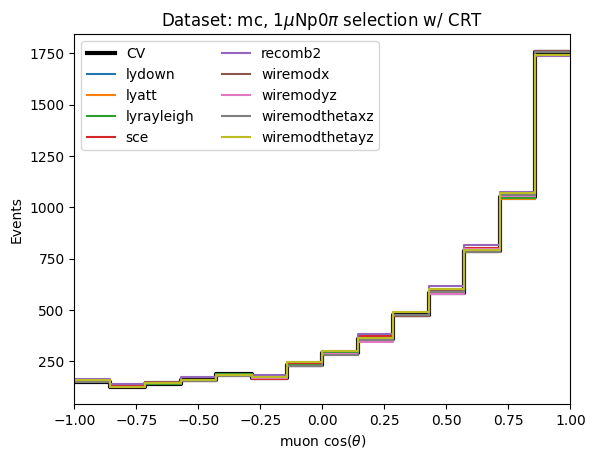

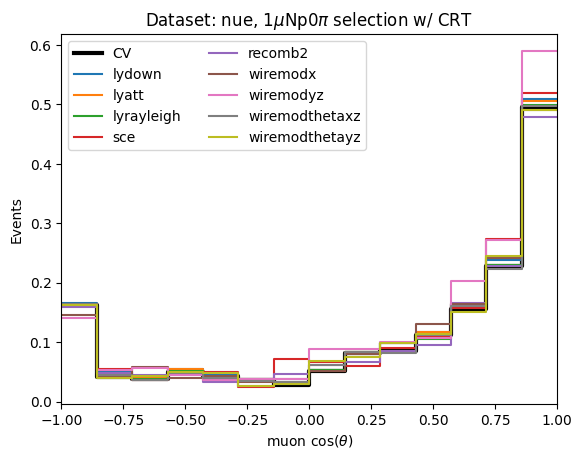

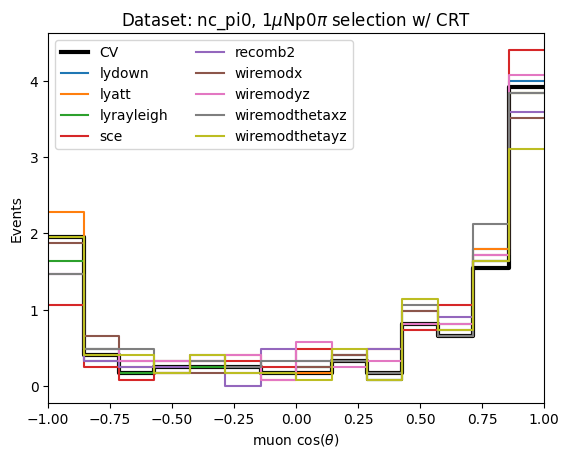

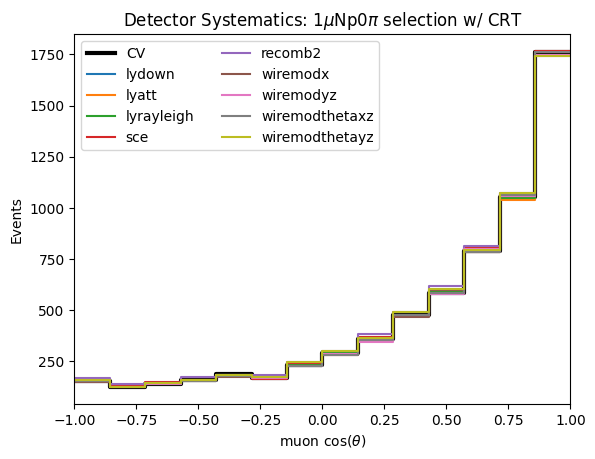

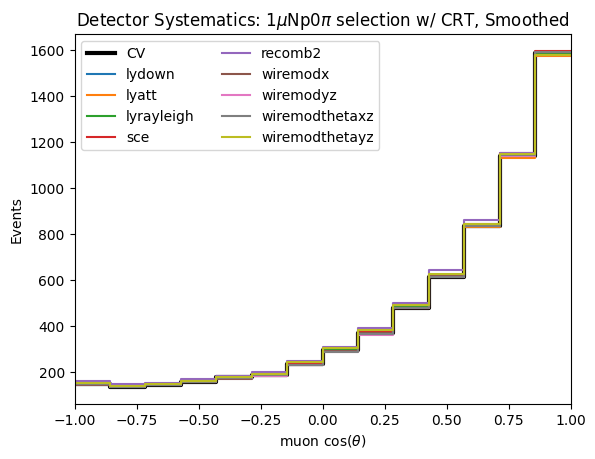

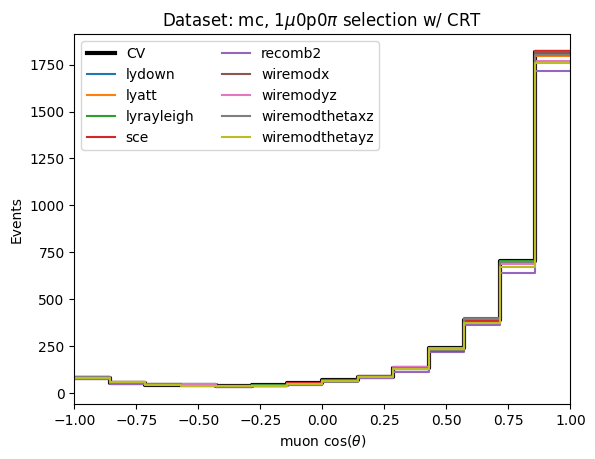

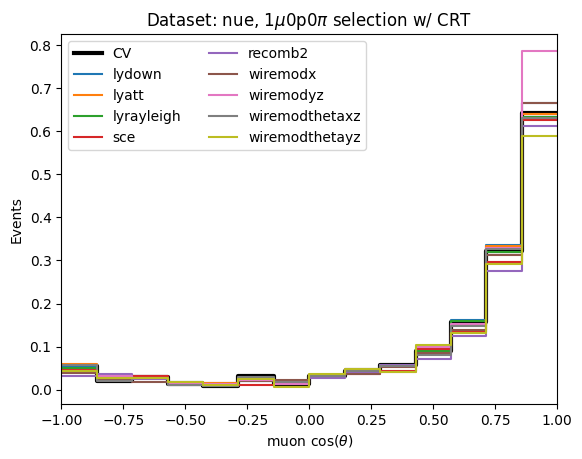

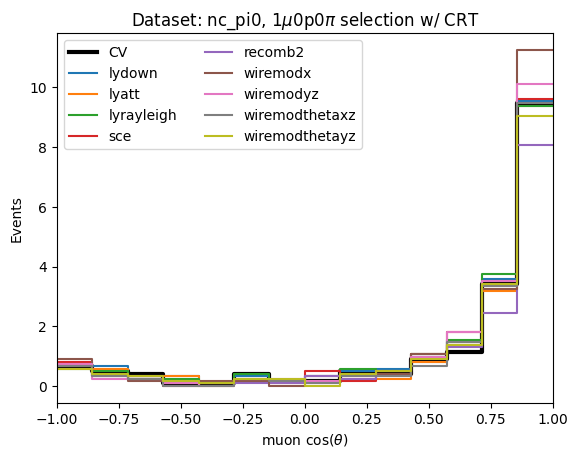

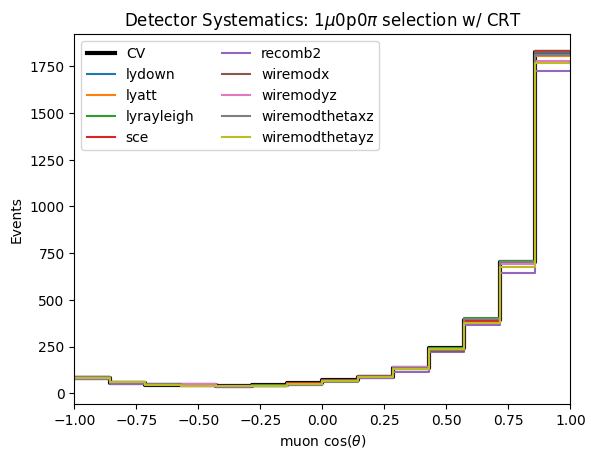

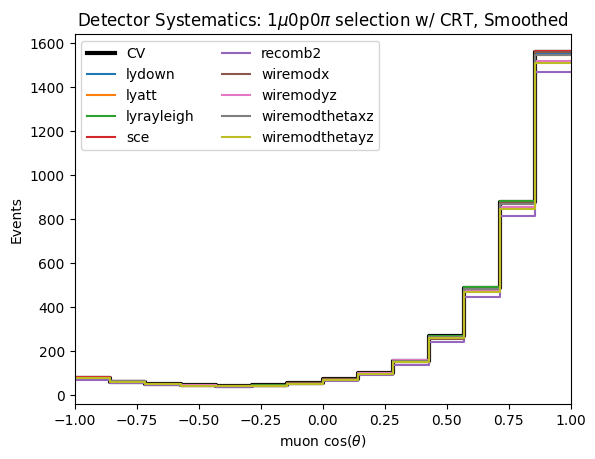

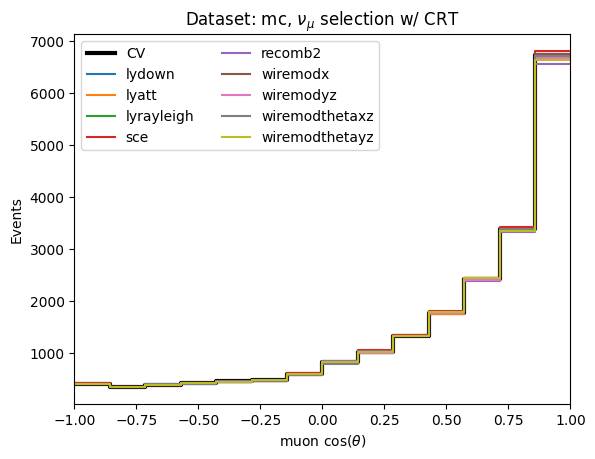

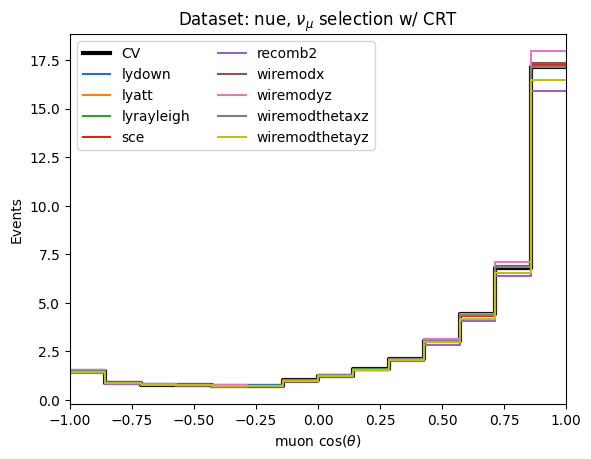

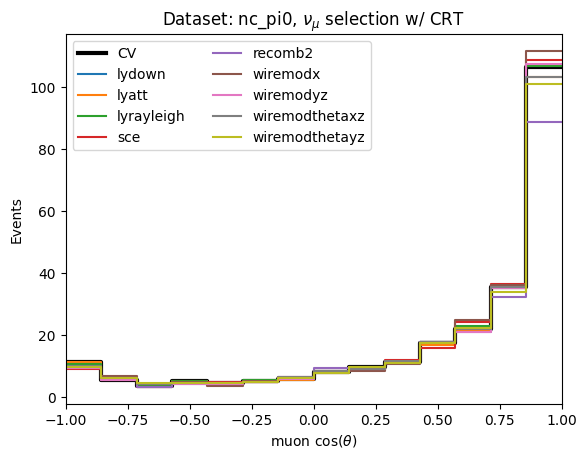

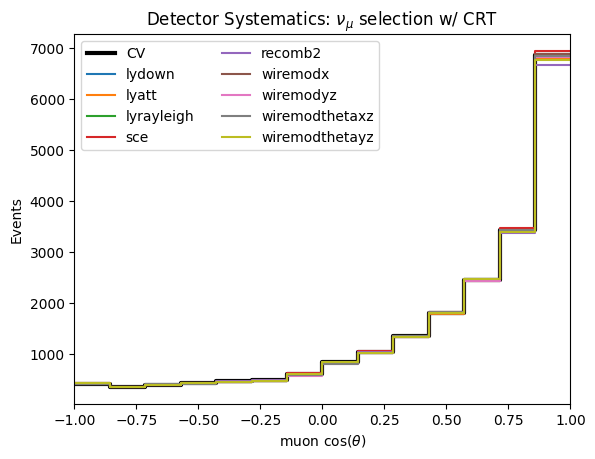

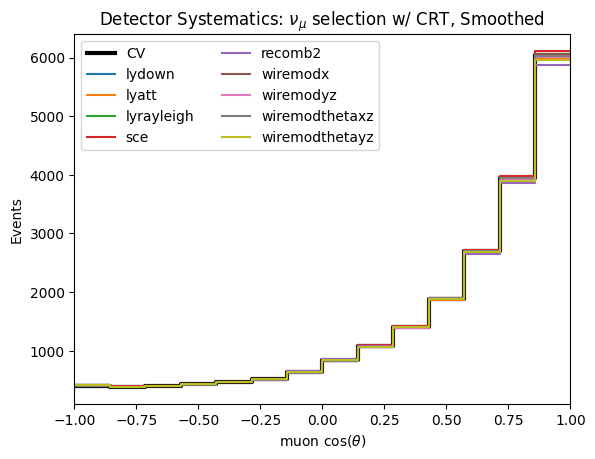

In [9]:
numu_sideband_detvars = detsys.make_variations(
    RUN,
    "muon_sideband",
    binning=sideband_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=True,
    loadsystematics=False,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False, 
    enable_cache=True,
    plot_output_dir="plots/numu_sideband_detvars",
)

In [10]:
numu_sideband_generator = hist.RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    uncertainty_defaults=None,
    detvar_data=numu_sideband_detvars
)

In [11]:
pred_with_detsys = numu_sideband_generator.get_total_prediction(add_precomputed_detsys=True)
pred_without_detsys = numu_sideband_generator.get_total_prediction(add_precomputed_detsys=False)

In [12]:
pred_with_detsys.std_devs - pred_without_detsys.std_devs

array([ 11.97624066,   9.00673139,   6.44843417,   7.0401818 ,
         6.44517048,  10.25737299,  13.6340162 ,  15.85211409,
        18.71517655,  18.11822102,  25.95605555,  19.28114828,
        14.9781309 ,  12.49353747,   9.34256651,   5.6599352 ,
         3.25125879,   4.95591187,   5.02454273,   6.58915367,
         8.15496188,   8.65356869,   7.69468743,  16.88236556,
        21.31944974,  30.74229614,  55.12024741, 128.35867146,
        17.67265717,   4.57038486,   1.90871189,   4.05519407,
        11.23137623,  11.86670681,  24.6765148 ,  30.84098391,
        23.10361882,  13.36006186,  20.04588387,  36.61323118,
        87.70975812, 228.72612489])

../../microfit/run_plotter.py:117: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")
../../microfit/histogram/histogram.py:552: UserWarning: The internal _bin_counts array has off-diagonal elements. The off-diagonal elements will be lost when dividing by an ndarray.
  "The internal _bin_counts array has off-diagonal elements. "


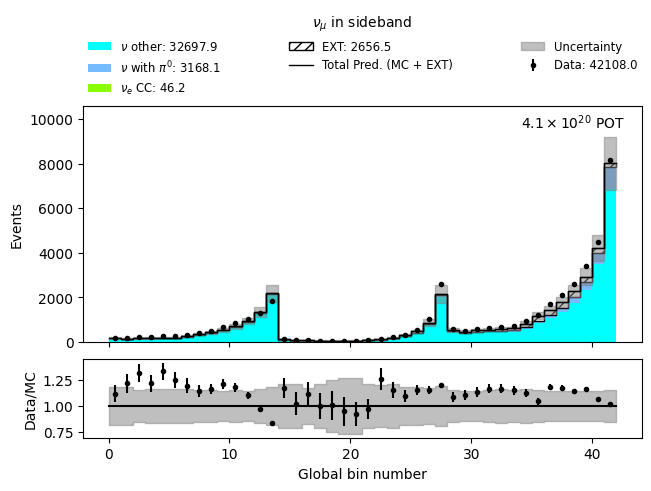

In [13]:
from microfit.run_plotter import RunHistPlotter

ax, ax_ratio = RunHistPlotter(numu_sideband_generator).plot(
    category_column="paper_category",
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    add_precomputed_detsys=True
)
legend = ax.get_legend()
legend.set_title(r"$\nu_\mu$ in sideband")


## Define two-shower sideband

In [9]:
RUN = ["4b", "4c"]
rundata_pi0, mc_weights_pi0, data_pot_pi0 = load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue", "drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    enable_cache=True,
    blinded=False,
)

Loading run 4b


../../data_loading.py:1112: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1112: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:628: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:628: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:791: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_

Loading run 4c


In [10]:
pi0_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
pi0_binning.set_selection(preselection="ZPTwoShrCRT", selection="ZPLOOSESELTWOSHR")
pi0_binning.label = "TWOSHR"

signal_generator_pi0 = hist.RunHistGenerator(
    rundata_pi0,
    pi0_binning,
    data_pot=data_pot_pi0,
    uncertainty_defaults=None,
    # detvar_data=pi0_detvars
)

../../microfit/run_plotter.py:117: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Data/MC'>)

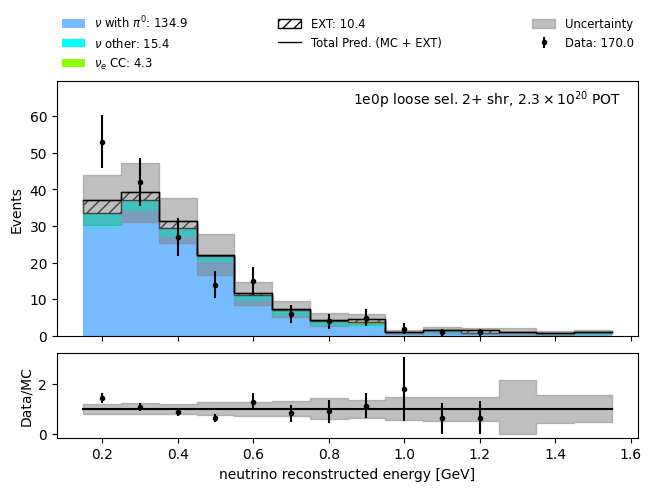

In [11]:
RunHistPlotter(signal_generator_pi0).plot(
    category_column="paper_category",
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    add_precomputed_detsys=False
)

Loading devar histograms from file: /uboone/data/users/atrettin/PELEE/cached_detvars/run_4d5_TWOSHR_two_shr_sideband.json
Making plots for mc


Making plots for nue
Making plots for nc_pi0


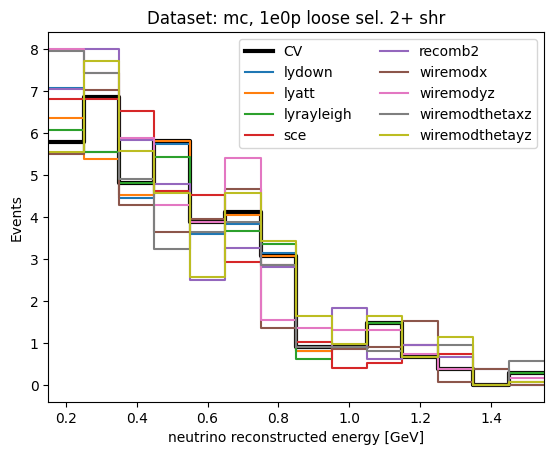

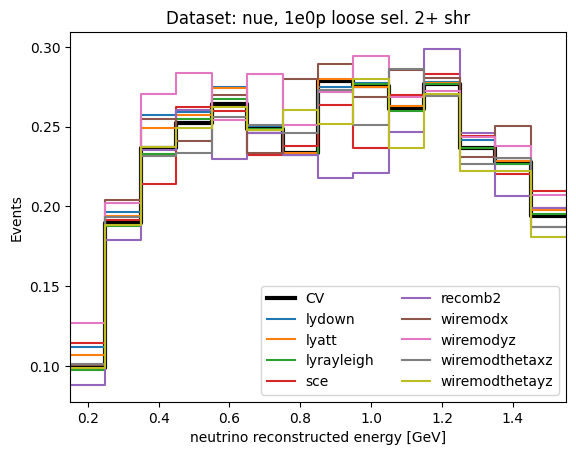

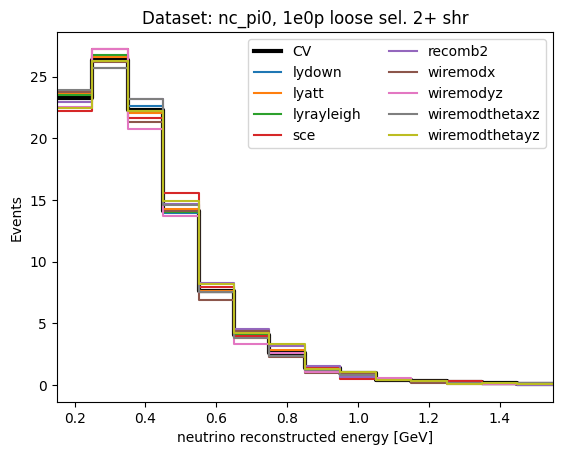

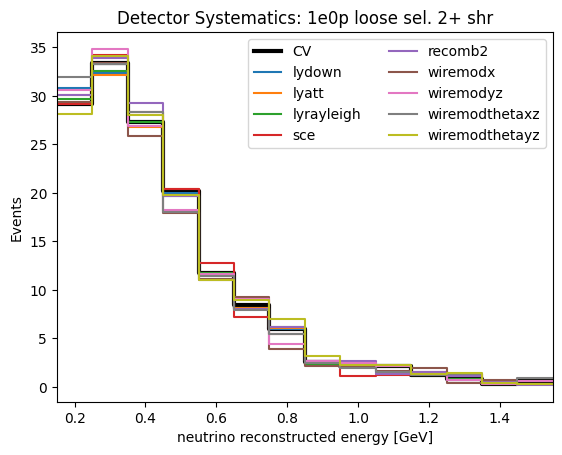

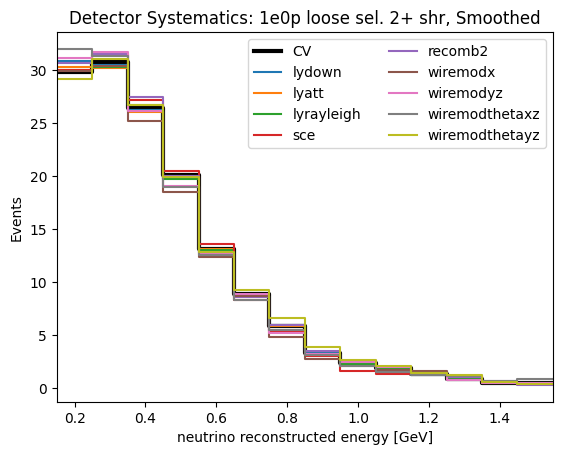

In [15]:
pi0_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
pi0_binning.set_selection(preselection="ZPTwoShrCRT", selection="ZPLOOSESELTWOSHR")
pi0_binning.label = "TWOSHR"

pi0_detvars = detsys.make_variations(
    RUN,
    "two_shr_sideband",
    pi0_binning,
    make_plots=True,
    plot_output_dir="plots/numu_sideband_detvars",
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=False,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    enable_cache=True,
    blinded=False
)

signal_generator_pi0 = hist.RunHistGenerator(
    rundata_pi0,
    pi0_binning,
    data_pot=data_pot_pi0,
    uncertainty_defaults=None,
    detvar_data=pi0_detvars
)

../../microfit/run_plotter.py:117: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Data/MC'>)

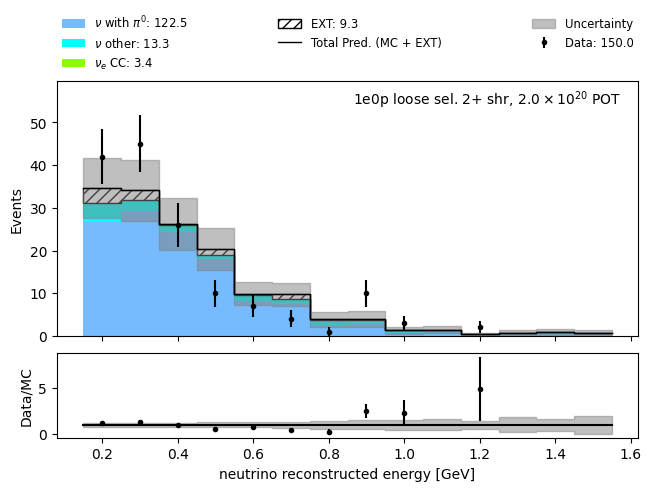

In [16]:
RunHistPlotter(signal_generator_pi0).plot(
    category_column="paper_category",
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    add_precomputed_detsys=True
)

## Load the signals

In [64]:
# RUN = ["1","2","3","4b","4c","4d","5"]
RUN = ["1", "2"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=True,
    use_new_signal_model=True,
)

Loading run 1
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.


../../data_loading.py:1112: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1112: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:628: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:628: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.


../../data_loading.py:791: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)
/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsFlux', 'weightsGenie'], dtype='object')]

  encoding=encoding,


CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.
Loading run 2
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.


../../data_loading.py:1147: RuntimeWarning: invalid value encountered in sqrt
  - reco_pz_hadsum * reco_pz_hadsum


CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.
CRT variables are not available for runs < 3. Variables will be added to data frame with values that ensure that the CRT condition is always True.


In [65]:
from microfit.histogram import Binning, MultiChannelBinning


# binning_def = {
#     "variable": "cos_shr_theta",
#     "bin_edges": [-1.0, -0.5,  0.0,  0.25,  0.375,  0.5,  0.625, 0.75, 0.875, 1.0],
#     "variable_tex": r"Reconstructed $\cos(\theta)$",
# }

# binning_npl = Binning(**binning_def)
# binning_npl.set_selection(preselection="NP", selection="NPBDT")
# binning_npl.label = "NPBDT_COSTHETA"

# binning_zpl = Binning(**binning_def)
# binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
# binning_zpl.label = "ZPBDT_COSTHETA"

# binning_zplcrt = Binning(**binning_def)
# binning_zplcrt.set_selection(preselection="ZP", selection="ZPBDT_CRT")
# binning_zplcrt.label = "ZPBDT_CRT_COSTHETA"

binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

binning_zplcrt = Binning.from_config(*binning_def)
binning_zplcrt.set_selection(preselection="ZP", selection="ZPBDT_CRT")
binning_zplcrt.label = "ZPBDT_CRT"

signal_binning = MultiChannelBinning([binning_npl, binning_zpl, binning_zplcrt])

In [66]:
signal_binning

MultiChannelBinning(binnings=[Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='NPBDT', variable_tex='Reconstructed Energy [GeV]', variable_tex_short=None, is_log=False, selection_query='nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and pi0_score > 0.67 and nonpi0_score > 0.70 and n_showers_contained == 1', selection_key='NPBDT', prese

In [67]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.histogram import RunHistGenerator

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

bad_backgr_query = '(mcf_pass_ncpi0 !=1 and (abs(nu_pdg) != 12 or ccnc != 0))'

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
    # detvar_data=signal_detvars,
    # extra_background_fractional_error={bad_backgr_query: 0.2}
)

In [68]:
signal_generator.ext_hist_generator.dataframe.query(binning_zplcrt.selection_query, engine="python")

,shr_hits_v_tot,shr_start_y,pi0_dedx1_fit_U,shr_tkfit_2cm_nhits_Y,true_nu_vtx_y,pi0_dot1,shr_hits_u_tot,shr1trk1moliereavg,CosmicIP,_opfilter_pe_beam,...,pi0_score,nonpi0_score,bkg_score,is_signal,paper_category,paper_category_xsec,paper_category_numu,category_1e1p,weights,dataset_name
entry,,,,,,,,,,,,,,,,,,,,,
3106,723,-68.335091,3.981853,4,-3.402823e+38,-1.0,303,-3.402823e+38,148.887573,0.0,...,0.481633,0.361611,0.905142,False,2,2,0,0,0.566940,ext
982,103,36.303841,2.897577,3,-3.402823e+38,-1.0,111,-3.402823e+38,63.396915,0.0,...,0.540425,0.522590,0.763433,False,2,2,0,0,0.402082,ext
1281,331,-23.451921,0.000000,4,-3.402823e+38,-1.0,168,-3.402823e+38,90.977875,0.0,...,0.676229,0.716210,0.860356,False,2,2,0,0,0.402082,ext
1667,701,3.235209,2.284311,1,-3.402823e+38,-1.0,399,-3.402823e+38,40.693161,0.0,...,0.513496,0.581066,0.773716,False,2,2,0,0,0.402082,ext
2602,213,-26.916021,1.290012,4,-3.402823e+38,-1.0,106,-3.402823e+38,47.589596,0.0,...,0.340180,0.447960,0.804072,False,2,2,0,0,0.402082,ext
4550,102,70.252029,1.126668,1,-3.402823e+38,-1.0,186,-3.402823e+38,54.183796,0.0,...,0.317944,0.451448,0.756790,False,2,2,0,0,0.402082,ext


In [69]:
signal_generator.ext_hist_generator.dataframe.query(binning_zpl.selection_query, engine="python")

,shr_hits_v_tot,shr_start_y,pi0_dedx1_fit_U,shr_tkfit_2cm_nhits_Y,true_nu_vtx_y,pi0_dot1,shr_hits_u_tot,shr1trk1moliereavg,CosmicIP,_opfilter_pe_beam,...,pi0_score,nonpi0_score,bkg_score,is_signal,paper_category,paper_category_xsec,paper_category_numu,category_1e1p,weights,dataset_name
entry,,,,,,,,,,,,,,,,,,,,,
3106,723,-68.335091,3.981853,4,-3.402823e+38,-1.0,303,-3.402823e+38,148.887573,0.0,...,0.481633,0.361611,0.905142,False,2,2,0,0,0.566940,ext
982,103,36.303841,2.897577,3,-3.402823e+38,-1.0,111,-3.402823e+38,63.396915,0.0,...,0.540425,0.522590,0.763433,False,2,2,0,0,0.402082,ext
1281,331,-23.451921,0.000000,4,-3.402823e+38,-1.0,168,-3.402823e+38,90.977875,0.0,...,0.676229,0.716210,0.860356,False,2,2,0,0,0.402082,ext
1667,701,3.235209,2.284311,1,-3.402823e+38,-1.0,399,-3.402823e+38,40.693161,0.0,...,0.513496,0.581066,0.773716,False,2,2,0,0,0.402082,ext
2602,213,-26.916021,1.290012,4,-3.402823e+38,-1.0,106,-3.402823e+38,47.589596,0.0,...,0.340180,0.447960,0.804072,False,2,2,0,0,0.402082,ext
4550,102,70.252029,1.126668,1,-3.402823e+38,-1.0,186,-3.402823e+38,54.183796,0.0,...,0.317944,0.451448,0.756790,False,2,2,0,0,0.402082,ext


(0.0, 8.0)

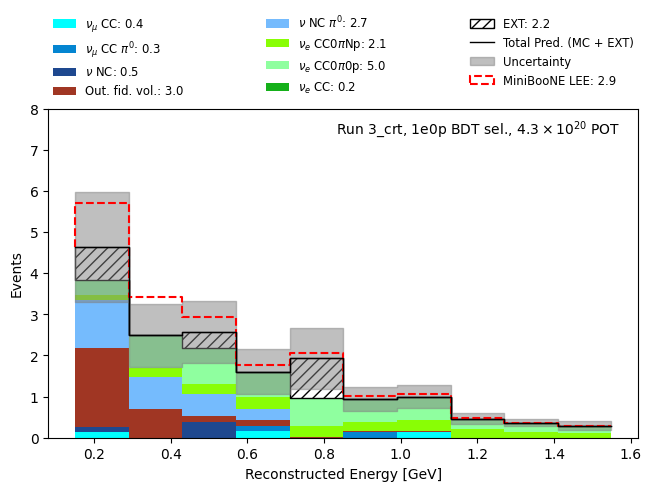

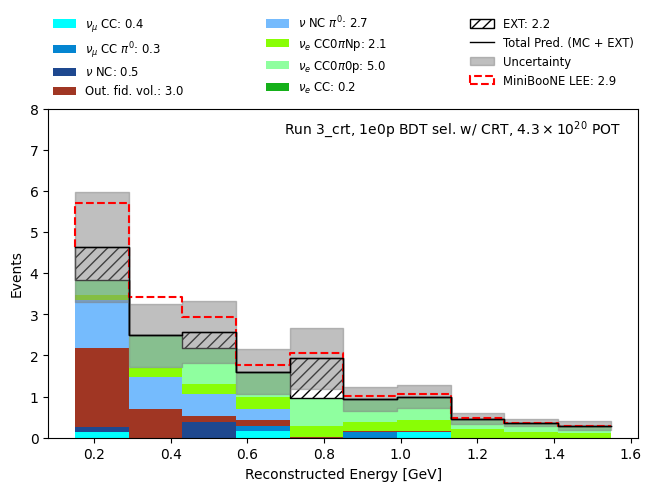

In [71]:
ax, _ = RunHistPlotter(signal_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=False,
    run_title="Run 3_crt",
    channel="ZPBDT"
)
ax.set_ylim(bottom=0, top=8)

ax, _ = RunHistPlotter(signal_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=False,
    run_title="Run 3_crt",
    channel="ZPBDT_CRT"
)
ax.set_ylim(bottom=0, top=8)

Making plots for mc
Making plots for nue
Making plots for nc_pi0
Making plots for mc
Making plots for nue
Making plots for nc_pi0


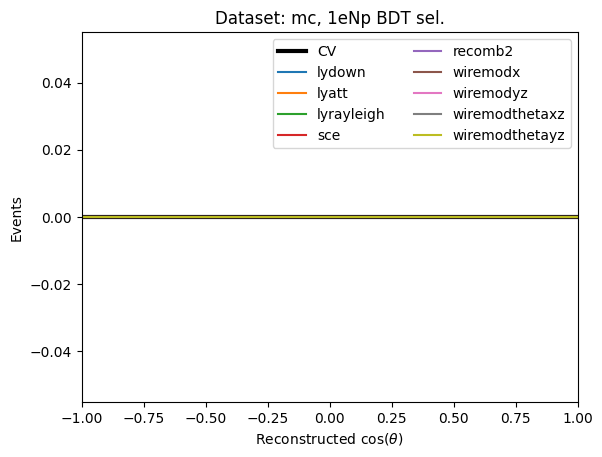

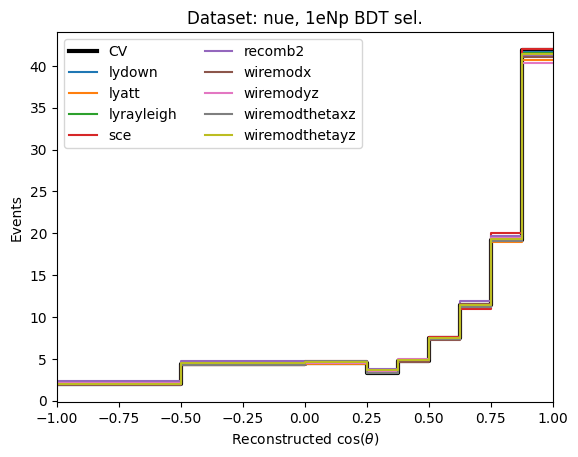

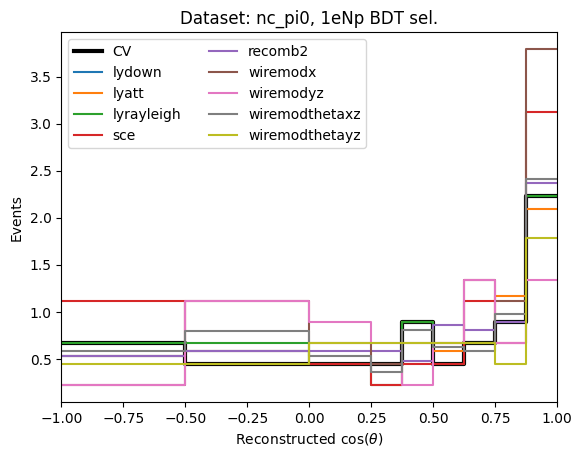

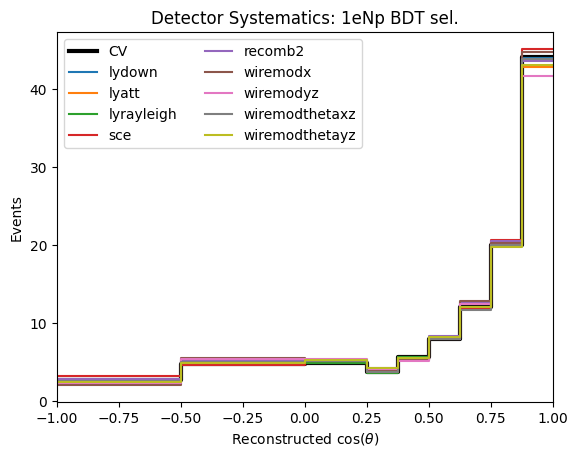

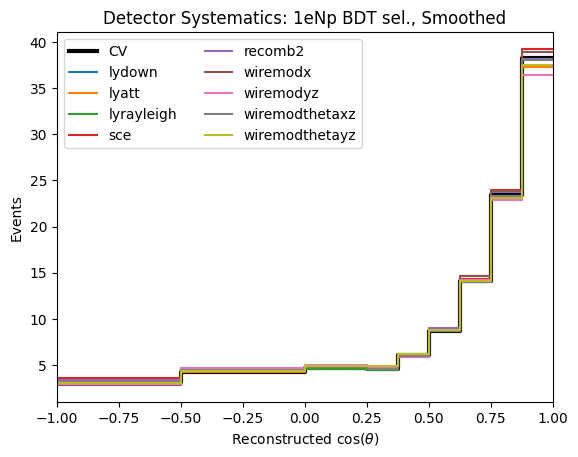

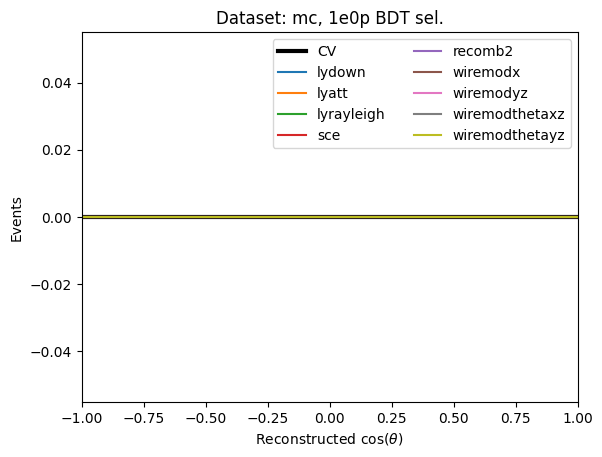

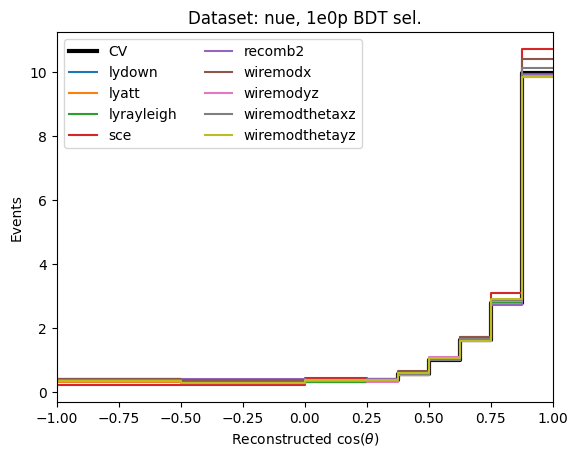

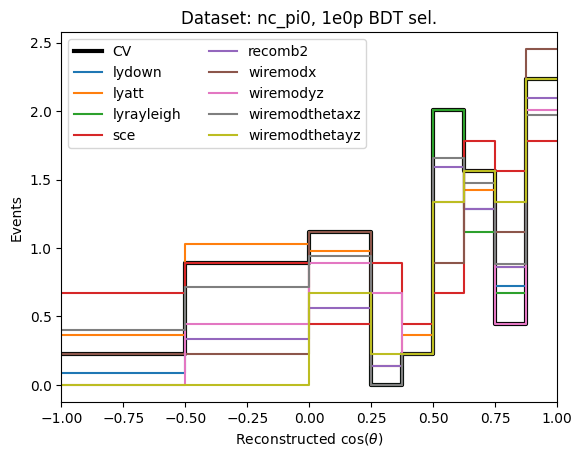

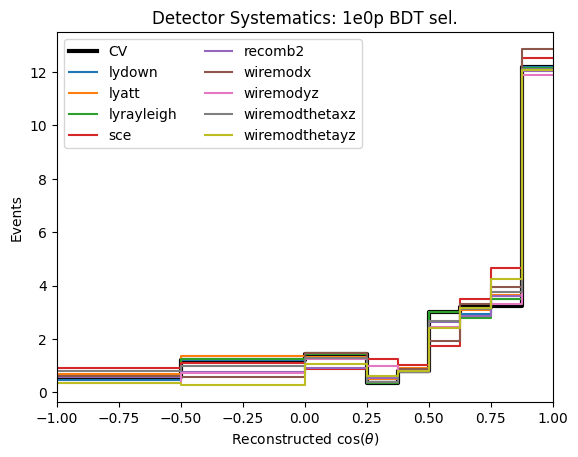

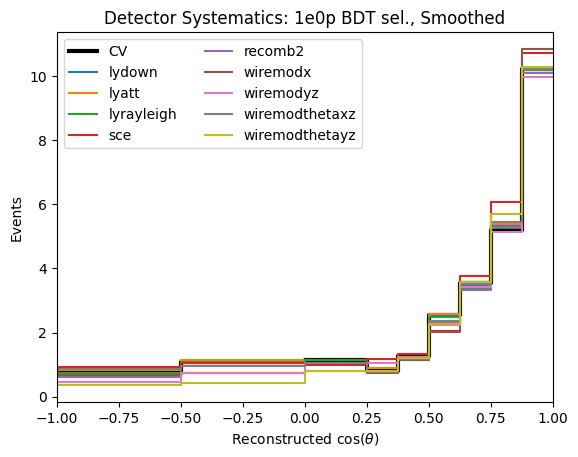

In [31]:
good_background_query = '(mcf_pass_ncpi0 == 1 or (abs(nu_pdg) == 12 and ccnc == 0))'

signal_detvars = detsys.make_variations(
    RUN,
    "bnb",
    signal_binning,
    make_plots=True,
    plot_output_dir="plots/signal_detvars",
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_crt_vars=False,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=True,
    extra_selection_query=good_background_query,
)

In [32]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.histogram import RunHistGenerator

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

bad_backgr_query = '(mcf_pass_ncpi0 !=1 and (abs(nu_pdg) != 12 or ccnc != 0))'

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
    detvar_data=signal_detvars,
    extra_background_fractional_error={bad_backgr_query: 0.2}
)

In [33]:
hist_with_detsys = signal_generator.get_total_prediction(add_precomputed_detsys=True, include_multisim_errors=True)
hist_no_detsys = signal_generator.get_total_prediction(add_precomputed_detsys=False, include_multisim_errors=True)

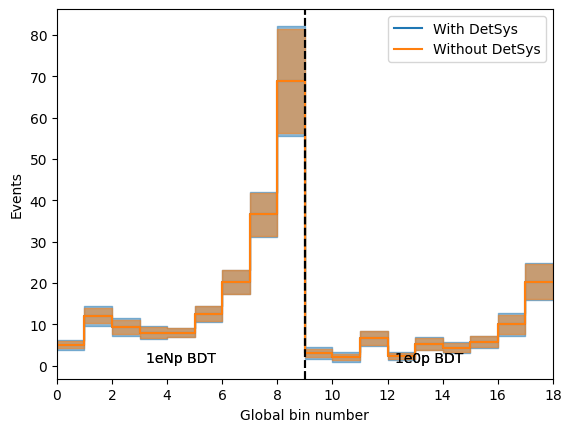

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist_with_detsys.draw(ax, label="With DetSys")
hist_no_detsys.draw(ax, label="Without DetSys")
ax.legend()
plt.show()

<AxesSubplot:title={'center':'Correlation matrix'}>

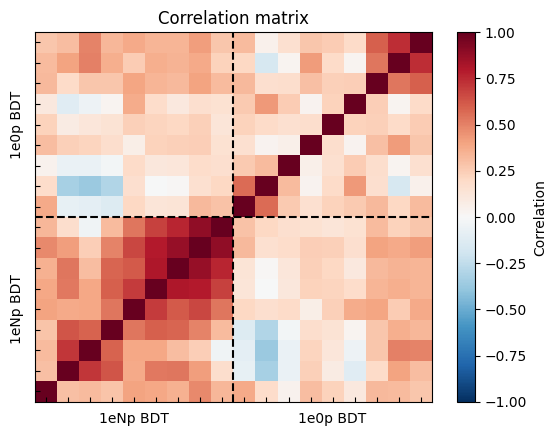

In [35]:
hist_with_detsys.draw_covariance_matrix()

<AxesSubplot:title={'center':'Correlation matrix'}>

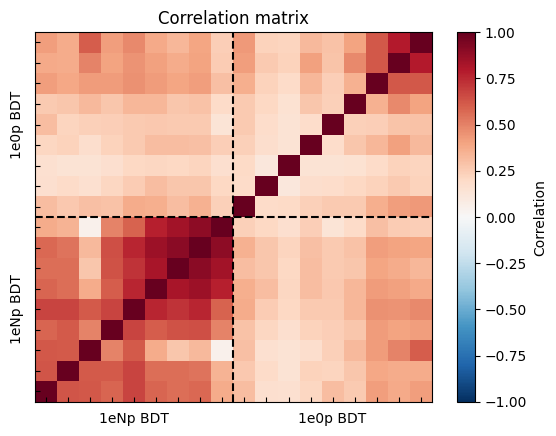

In [36]:
hist_no_detsys.draw_covariance_matrix()

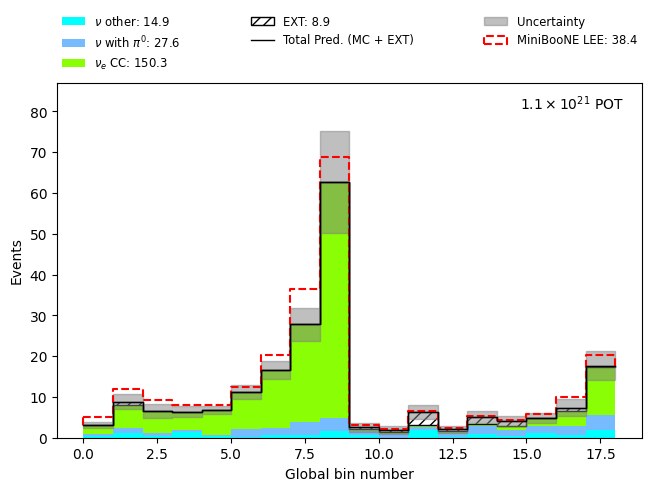

In [37]:
ax = RunHistPlotter(signal_generator).plot(
    category_column="paper_category",
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    # channel="NPBDT",
    add_precomputed_detsys=True
)

In [39]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[numu_sideband_generator, signal_generator_pi0, signal_generator],
    constraint_channels=["NUMUCRTNP0PI_MU_THETA", "NUMUCRT0P0PI_MU_THETA", "TWOSHR"],
    signal_channels=["NPBDT_COSTHETA", "ZPBDT_COSTHETA"],
)

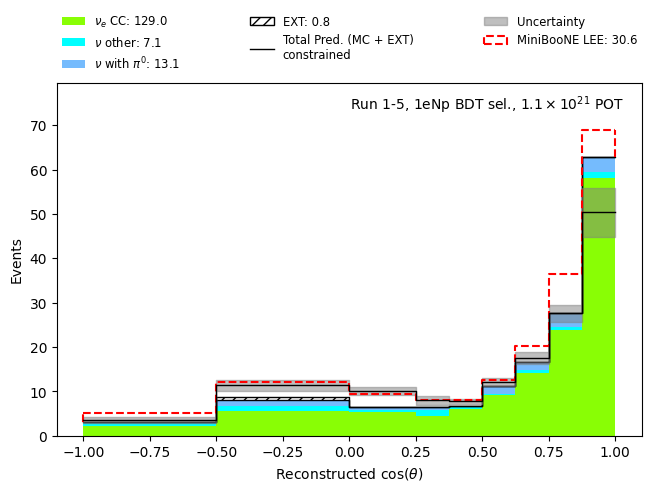

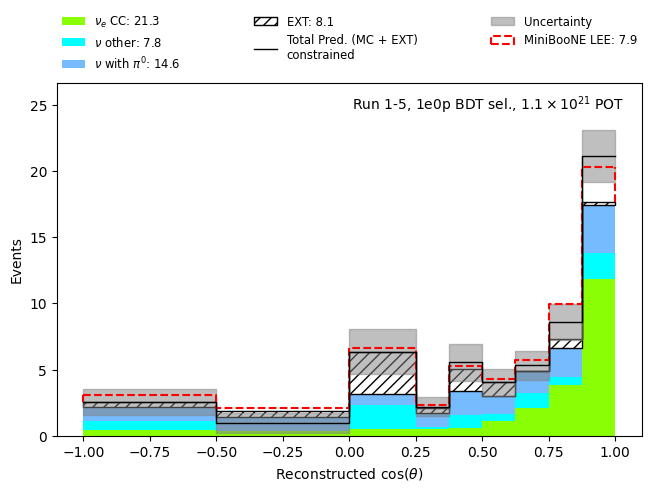

In [40]:
analysis.plot_signals(
    add_ext_error_floor=False,
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    use_sideband=True,
    separate_figures=True,
    add_precomputed_detsys=True,
    run_title="Run 1-5",
    save_path="./muon_mu_theta_sideband_constraints_with_detvar/",
)

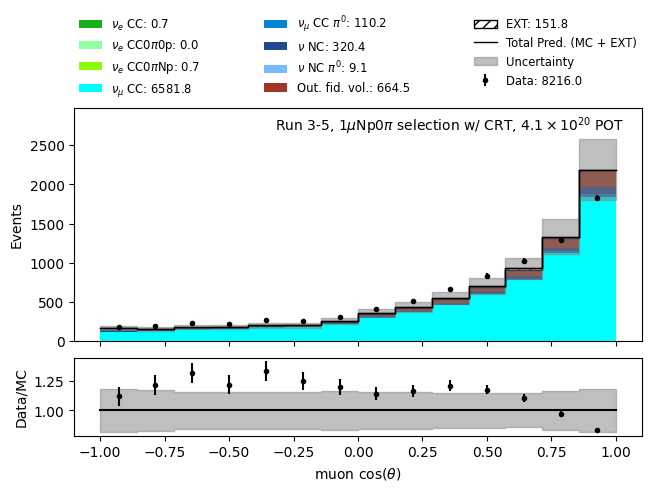

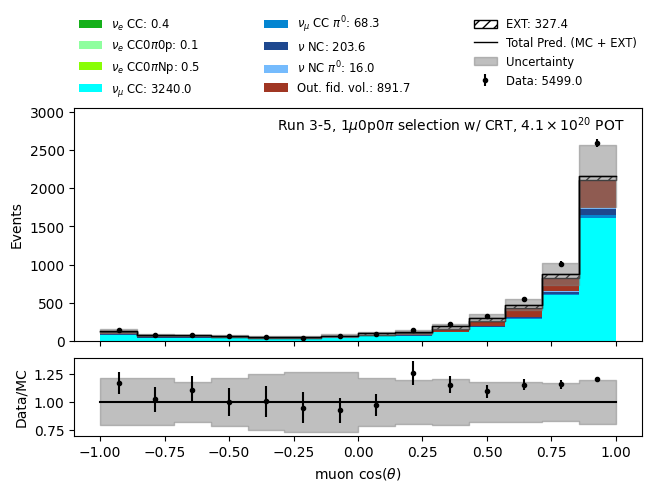

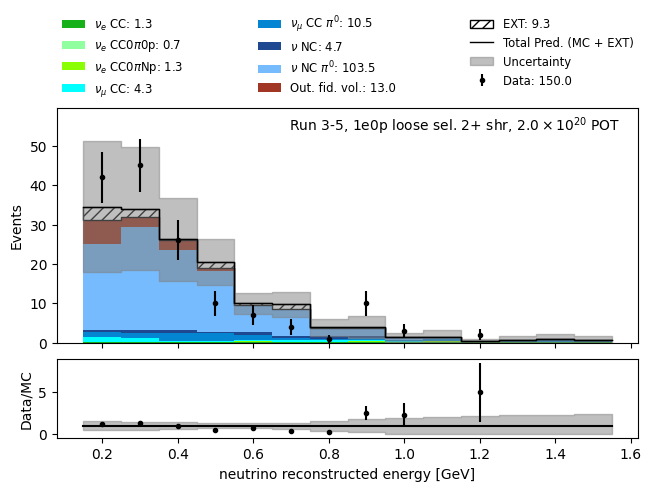

In [43]:
analysis.plot_sidebands(
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    add_precomputed_detsys=True,
    separate_figures=True,
    run_title="Run 3-5",
    save_path="./muon_mu_theta_sideband_constraints_with_detvar/",
)

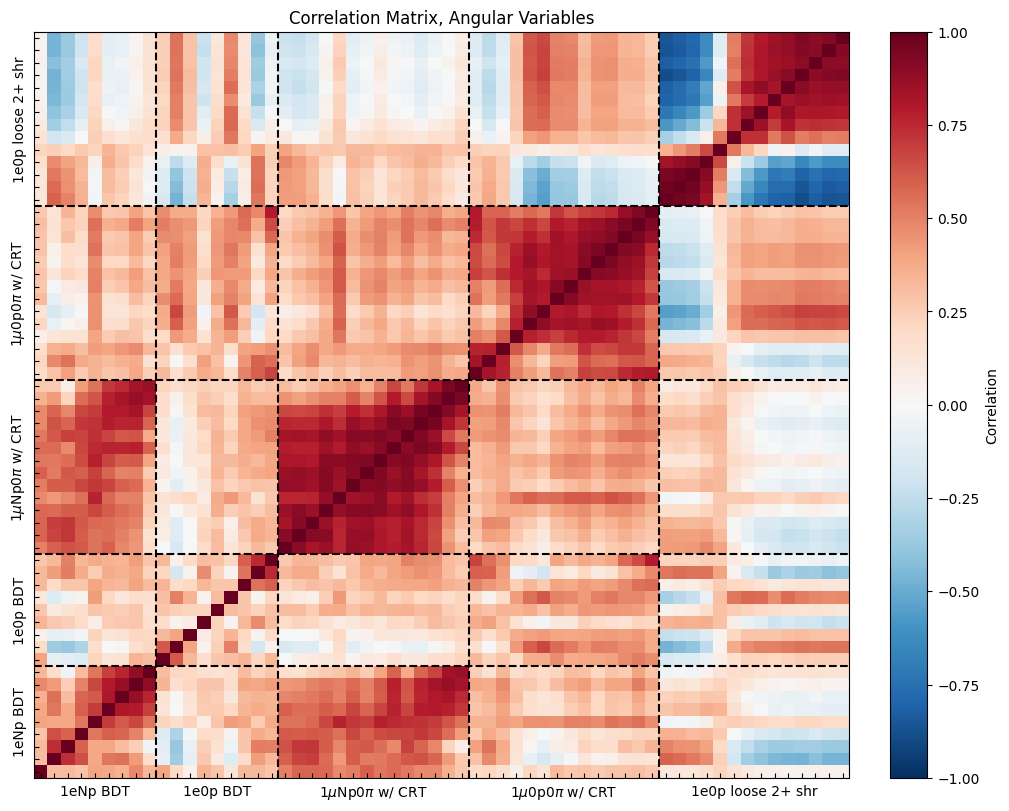

In [45]:
fig, ax = analysis.plot_correlation(add_precomputed_detsys=True)
ax.set_title("Correlation Matrix, Angular Variables")
fig.savefig("./muon_mu_theta_sideband_constraints_with_detvar/correlation.pdf")

In [33]:
two_hypo_result = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    add_precomputed_detsys=True,
    n_trials=10000,
)

Generating H0 histogram


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


Including detsim uncertainties
Generating H1 histogram
Including detsim uncertainties


Generating pseudo-experiments: 100%|██████████| 10000/10000 [01:25<00:00, 116.59it/s]


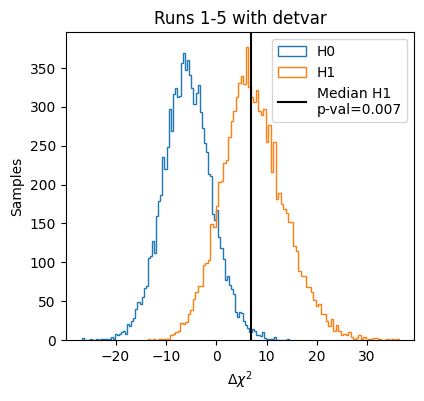

In [36]:
plt.figure(figsize=(4.5, 4))
plt.hist(two_hypo_result["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5 with detvar")
plt.savefig("./new_sideband_plan_b_with_detvar/runs1-5_sensitivity_with_detvar.pdf")
plt.show()

In [35]:
two_hypo_result_no_detvar = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    add_precomputed_detsys=False,
    n_trials=10000,
)

Generating H0 histogram
Generating H1 histogram


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",
Generating pseudo-experiments: 100%|██████████| 10000/10000 [01:02<00:00, 160.31it/s]


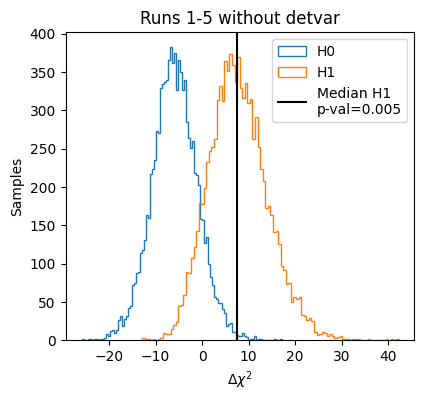

In [38]:
plt.figure(figsize=(4.5, 4))
plt.hist(two_hypo_result_no_detvar["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_no_detvar["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_no_detvar["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_no_detvar['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5 without detvar")
plt.savefig("./new_sideband_plan_b_with_detvar/runs1-5_sensitivity_no_detvar.pdf")
plt.show()